In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns

import plotly.express as px

from scipy.stats.mstats import winsorize

In [2]:
ecom_df = pd.read_csv('./UK Ecommerce.csv',encoding='unicode_escape')
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


데이터의 열

1. Invoice No: Invoice 번호. 각 판매 거래에 대한 고유 식별 번호

2. StockCode: 제품 코드. 각 제품의 고유 식별 번호

3. 설명: 제품 설명. 제품 이름 및 기타 기능이 포함되어 있음

4. 수량 : 판매된 제품의 수량 각 송장 라인별 판매된 제품의 수량을 표시

5. Invoice Date : Invoice Date. 매매거래 일시를 표시

6. 단가 : 제품단가. 단품의 판매가격을 나타냄

7. CustomerID : CustomerID. 고객별 고유 식별번호.

8. 국가: 고객의 국가. 고객이 거주하는 국가를 표시

추가 정보

1. 데이터 세트에는 541,909개의 행과 8개의 열이 포함

2. 데이터 세트에 결측값이 있음

In [3]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
ecom_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
ecom_df.duplicated().sum()

5268

In [6]:
ecom_df.drop_duplicates(inplace=True)
ecom_df.dropna(subset=['CustomerID'], inplace=True)

ecom_df.shape

(401604, 8)

In [7]:
ecom_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
ecom_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
ecom_df["Description"].nunique()

3896

가장 많이 등장하는 상품 상위 5개

In [10]:
product_revenue = ecom_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()
print(product_revenue)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
Name: Quantity, dtype: int64


In [11]:
ecom_df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity",ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
POPCORN HOLDER,30492
RABBIT NIGHT LIGHT,27045
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25305


In [12]:
ecom_df["TotalPrice"] = ecom_df["Quantity"] * ecom_df["UnitPrice"]

In [13]:
ecom_df.groupby("Description").agg({"TotalPrice": "sum"}).sort_values("TotalPrice",ascending=False).head()

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,132567.70
WHITE HANGING HEART T-LIGHT HOLDER,93767.80
JUMBO BAG RED RETROSPOT,83056.52
PARTY BUNTING,67628.43
POSTAGE,66710.24


ecom_df의 각 열에 대한 요약 통계를 행으로 나타내 반환

In [14]:
ecom_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
TotalPrice,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6


In [15]:
sum(ecom_df['UnitPrice'] == 0)

40

In [16]:
print(sorted(ecom_df['StockCode'].unique())[-30:])

['90214C', '90214D', '90214E', '90214F', '90214G', '90214H', '90214I', '90214J', '90214K', '90214L', '90214M', '90214N', '90214O', '90214P', '90214R', '90214S', '90214T', '90214U', '90214V', '90214W', '90214Y', '90214Z', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST']


In [17]:
ecom_df.query('Quantity < 0').head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80


In [18]:
ecom_df.query('CustomerID == "N/A"')['InvoiceNo'].nunique()

0

In [19]:
print(ecom_df['InvoiceDate'].dtype)
ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate'])

object


In [20]:
ecom_df['InvoiceDate'] = pd.to_datetime(ecom_df['InvoiceDate'])

ecom_df['Year'] = ecom_df['InvoiceDate'].dt.year
ecom_df['Month'] = ecom_df['InvoiceDate'].dt.month
ecom_df['Day'] = ecom_df['InvoiceDate'].dt.day
ecom_df['Hour'] = ecom_df['InvoiceDate'].dt.hour

In [21]:
print(ecom_df[['Year', 'Month', 'Day', 'Hour']].head())

   Year  Month  Day  Hour
0  2010     12    1     8
1  2010     12    1     8
2  2010     12    1     8
3  2010     12    1     8
4  2010     12    1     8


In [22]:
ecom_df.sort_values('TotalPrice', ascending=True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,2011,12,9,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,2011,1,18,10
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,2011,6,10,15
422375,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536.0,France,-8322.12,2011,10,27,14
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75,2011,5,3,12


In [23]:
ecom_df = ecom_df[~ecom_df["InvoiceNo"].str.contains("C")]

In [24]:
ecom_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,392732.0,13.153718,1.0,2.0,6.0,12.0,80995.0,181.58842
InvoiceDate,392732,2011-07-10 19:15:24.576301568,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 12:02:00,2011-10-20 12:53:00,2011-12-09 12:50:00,NaN
UnitPrice,392732.0,3.125596,0.0,1.25,1.95,3.75,8142.75,22.240725
CustomerID,392732.0,15287.734822,12346.0,13955.0,15150.0,16791.0,18287.0,1713.567773
TotalPrice,392732.0,22.629195,0.0,4.95,12.39,19.8,168469.6,311.083465
Year,392732.0,2010.93463,2010.0,2011.0,2011.0,2011.0,2011.0,0.247178
Month,392732.0,7.601935,1.0,5.0,8.0,11.0,12.0,3.415023
Day,392732.0,15.044651,1.0,7.0,15.0,22.0,31.0,8.652557
Hour,392732.0,12.721579,6.0,11.0,13.0,14.0,20.0,2.276677


In [25]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [26]:
country_sales = ecom_df.groupby('Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
fig = px.bar(country_sales, x='Country', y='Quantity', color='Country',title='국가별 총 판매량',labels={'Quantity': '총 판매량', 'Country': '국가'})
fig.update_layout(xaxis=dict(title=''), yaxis=dict(title='총 판매량'))
fig.show()


In [27]:
top_products = ecom_df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
top_products_country = ecom_df[ecom_df['Description'].isin(top_products['Description'])].groupby(['Description', 'Country'])['Quantity'].sum().reset_index()
fig = px.bar(top_products_country, x='Description', y='Quantity', color='Country',
             title='국가별 상위 10개 제품 판매량',
             labels={'Quantity': '총 판매수량', 'Description': '상품'})
fig.update_layout(barmode='stack')
fig.show()

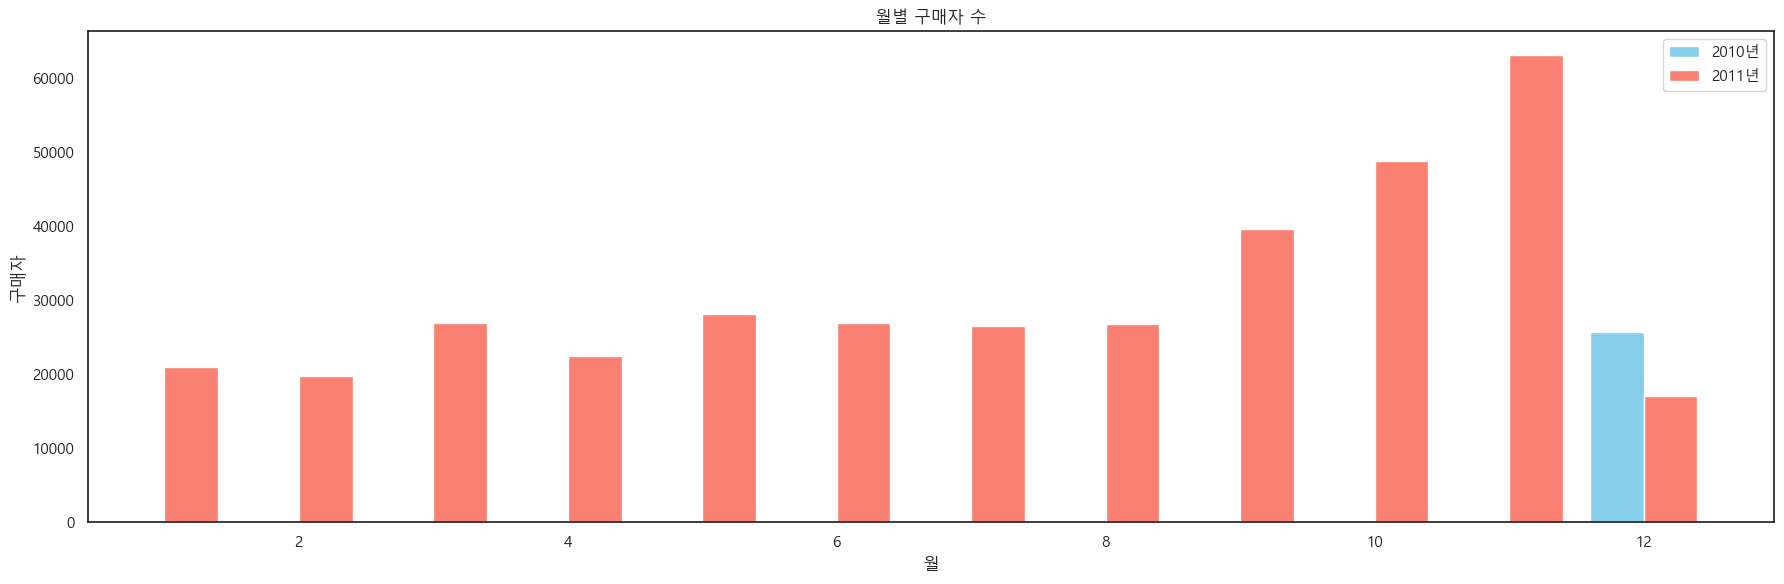

In [28]:
ecom_df_2010 = ecom_df[ecom_df['Year'] == 2010]
monthly_sales_2010 = ecom_df_2010.groupby('Month')['CustomerID'].count()

ecom_df_2011 = ecom_df[ecom_df['Year'] == 2011]
monthly_sales_2011 = ecom_df_2011.groupby('Month')['CustomerID'].count()

plt.figure(figsize=(18, 6))
plt.bar(monthly_sales_2010.index - 0.2, monthly_sales_2010, color='skyblue', label='2010년', width=0.4)
plt.bar(monthly_sales_2011.index + 0.2, monthly_sales_2011, color='salmon', label='2011년', width=0.4)
plt.xlabel('월')
plt.ylabel('구매자')
plt.title('월별 구매자 수')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# 월별 총 수익 계산
monthly_total_price = ecom_df.groupby('Month')['TotalPrice'].sum()

# 월별 총 수익 출력
print("월별 총 수익:")
for month, total_price in monthly_total_price.items():
    print(f"{month}: {total_price: }")

월별 총 수익:
1:  568101.31
2:  446084.92
3:  594081.76
4:  468374.331
5:  677355.15
6:  660046.05
7:  598962.901
8:  644051.04
9:  950690.202
10:  1035642.45
11:  1156205.61
12:  1087613.17


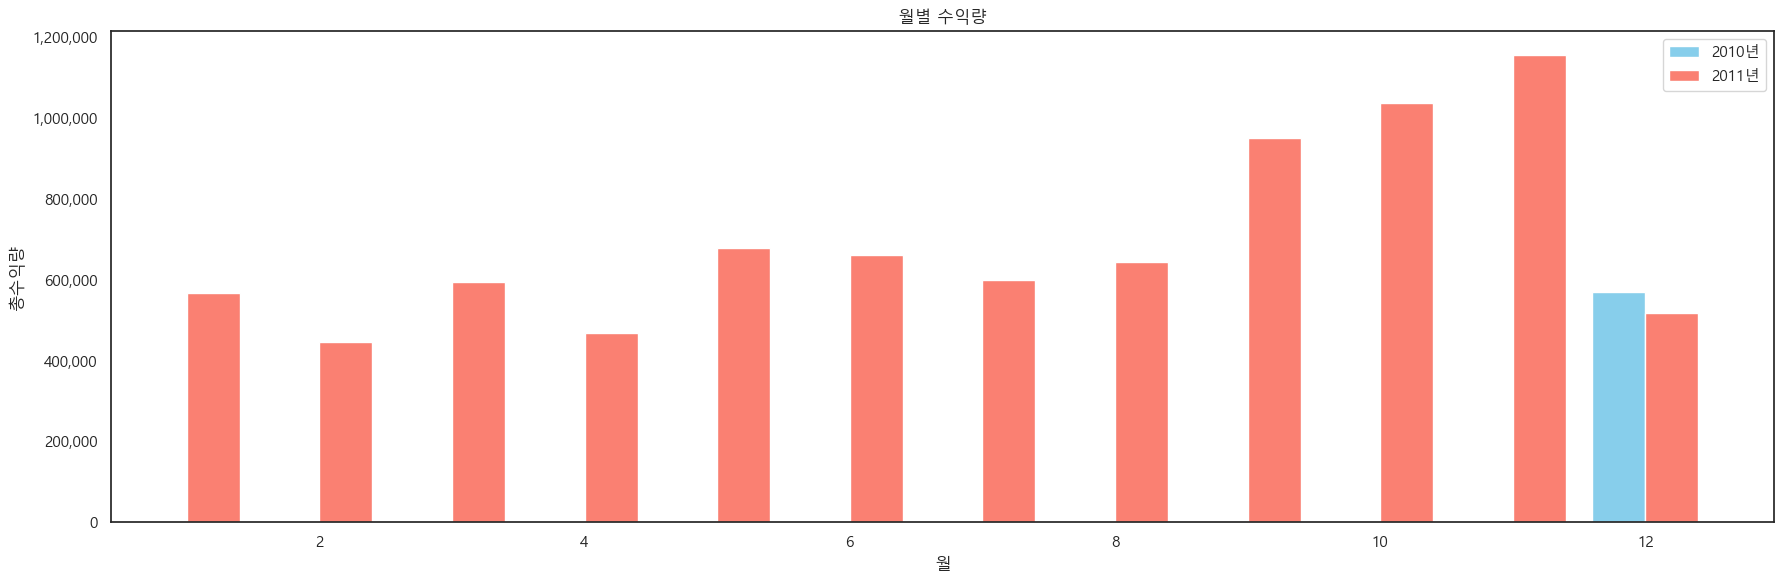

In [30]:
monthly_sales_2010 = ecom_df[ecom_df['Year'] == 2010].groupby('Month')['TotalPrice'].sum().sort_index()
monthly_sales_2011 = ecom_df[ecom_df['Year'] == 2011].groupby('Month')['TotalPrice'].sum().sort_index()

plt.figure(figsize=(18, 6))
plt.bar(monthly_sales_2010.index - 0.2, monthly_sales_2010, color='skyblue', label='2010년', width=0.4)
plt.bar(monthly_sales_2011.index + 0.2, monthly_sales_2011, color='salmon', label='2011년', width=0.4)
plt.xlabel('월')
plt.ylabel('총수익량')
plt.title('월별 수익량')
plt.legend()

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

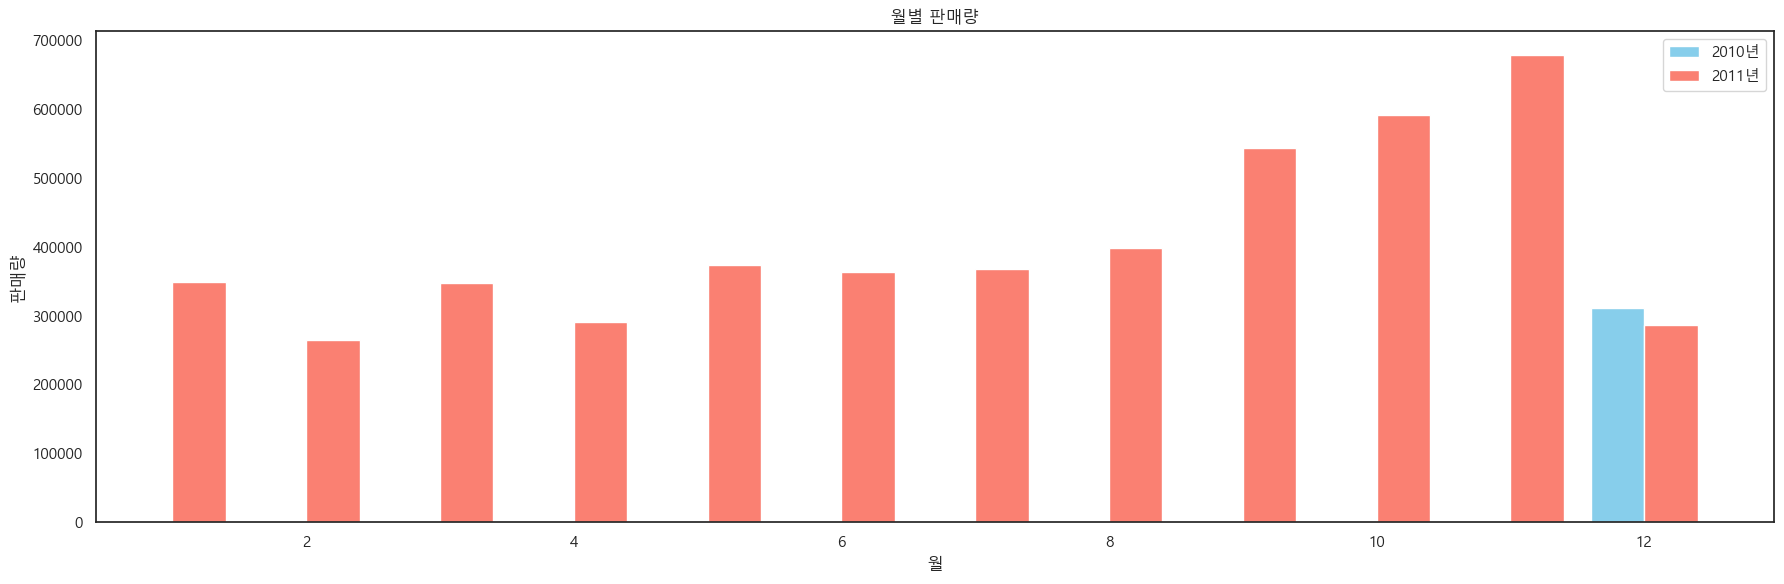

In [31]:
ecom_df_2010 = ecom_df[ecom_df['Year'] == 2010]
monthly_sales_2010 = ecom_df_2010.groupby('Month')['Quantity'].sum()

ecom_df_2011 = ecom_df[ecom_df['Year'] == 2011]
monthly_sales_2011 = ecom_df_2011.groupby('Month')['Quantity'].sum()

plt.figure(figsize=(18, 6))
plt.bar(monthly_sales_2010.index - 0.2, monthly_sales_2010, color='skyblue', label='2010년', width=0.4)
plt.bar(monthly_sales_2011.index + 0.2, monthly_sales_2011, color='salmon', label='2011년', width=0.4)
plt.xlabel('월')
plt.ylabel('판매량')
plt.title('월별 판매량')
plt.legend()
plt.tight_layout()
plt.show()


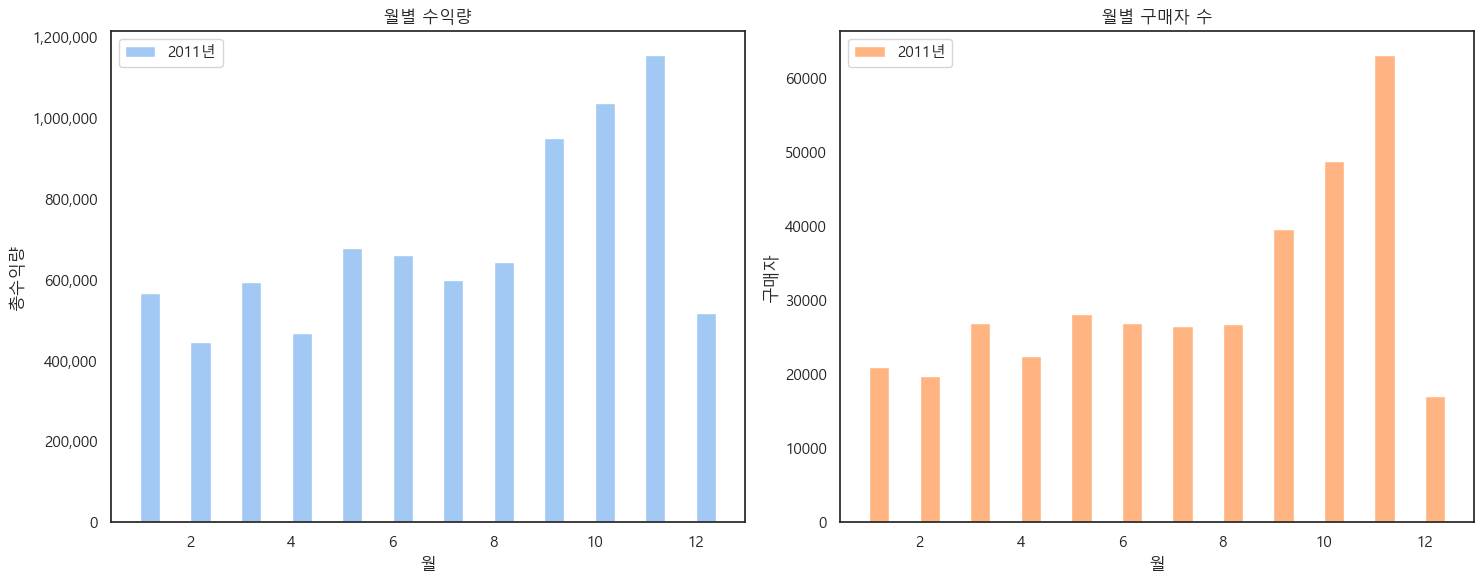

In [33]:
pastel_colors = sns.color_palette('pastel')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 subplot에 월별 수익량 그래프를 그립니다.
# monthly_sales_2010 = ecom_df[ecom_df['Year'] == 2010].groupby('Month')['TotalPrice'].sum().sort_index()
monthly_sales_2011 = ecom_df[ecom_df['Year'] == 2011].groupby('Month')['TotalPrice'].sum().sort_index()
# axes[0].bar(monthly_sales_2010.index - 0.2, monthly_sales_2010, color='skyblue', label='2010년', width=0.4)
axes[0].bar(monthly_sales_2011.index + 0.2, monthly_sales_2011, color=pastel_colors[0], label='2011년', width=0.4)
axes[0].set_xlabel('월')
axes[0].set_ylabel('총수익량')
axes[0].set_title('월별 수익량')
axes[0].legend()
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# 두 번째 subplot에 월별 구매자 수 그래프를 그립니다.
# monthly_customers_2010 = ecom_df[ecom_df['Year'] == 2010].groupby('Month')['CustomerID'].count()
monthly_customers_2011 = ecom_df[ecom_df['Year'] == 2011].groupby('Month')['CustomerID'].count()
# axes[1].bar(monthly_customers_2010.index - 0.2, monthly_customers_2010, color='skyblue', label='2010년', width=0.4)
axes[1].bar(monthly_customers_2011.index + 0.2, monthly_customers_2011, color=pastel_colors[1], label='2011년', width=0.4)
axes[1].set_xlabel('월')
axes[1].set_ylabel('구매자')
axes[1].set_title('월별 구매자 수')
axes[1].legend()

plt.tight_layout()
plt.show()


9월에서 11월 기간 사이에 판매량이 증가하는 추세를 보임
주로 가을에서 겨울 기간에 판매량이 많아 보인다

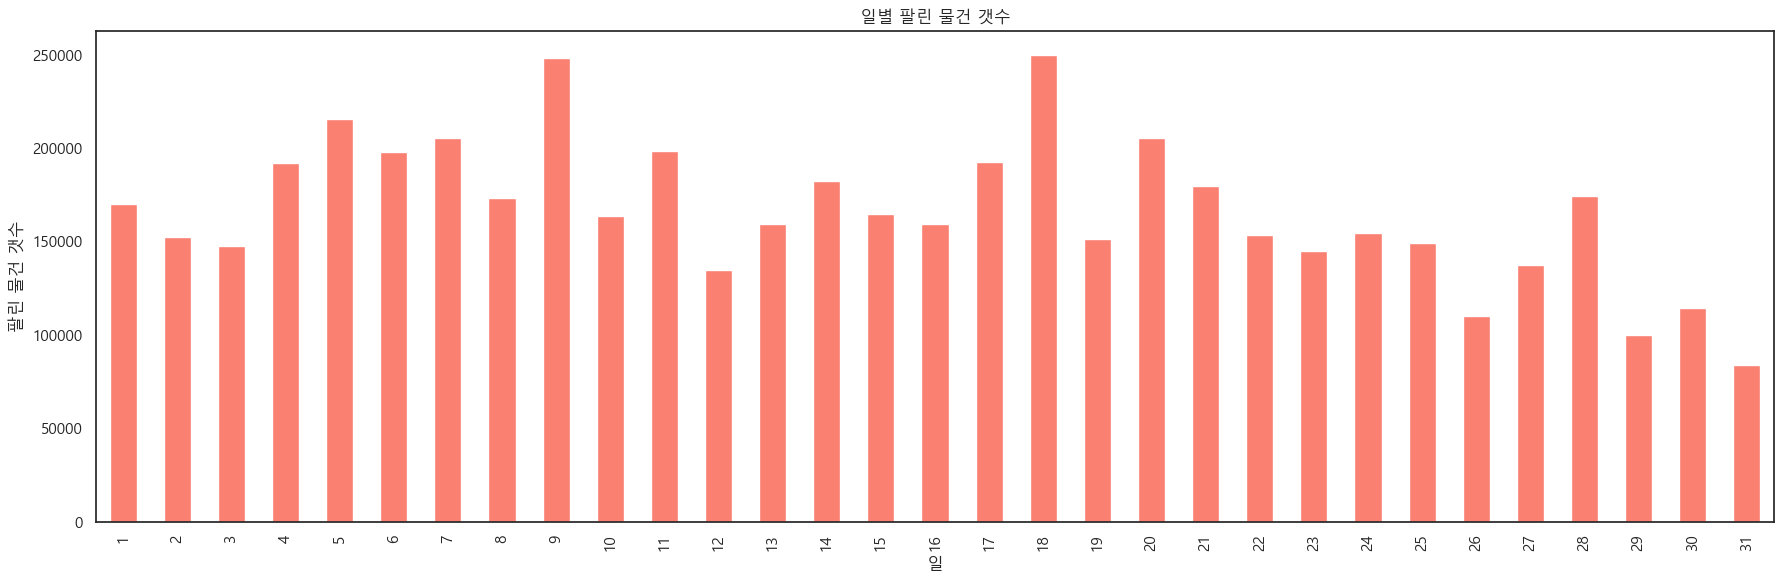

In [31]:
monthly_sales = ecom_df.groupby('Day')['Quantity'].sum()

plt.figure(figsize=(18, 6))
monthly_sales.plot(kind='bar', color='salmon')
plt.xlabel('일')
plt.ylabel('팔린 물건 갯수')
plt.title('일별 팔린 물건 갯수')
plt.tight_layout()
plt.show()

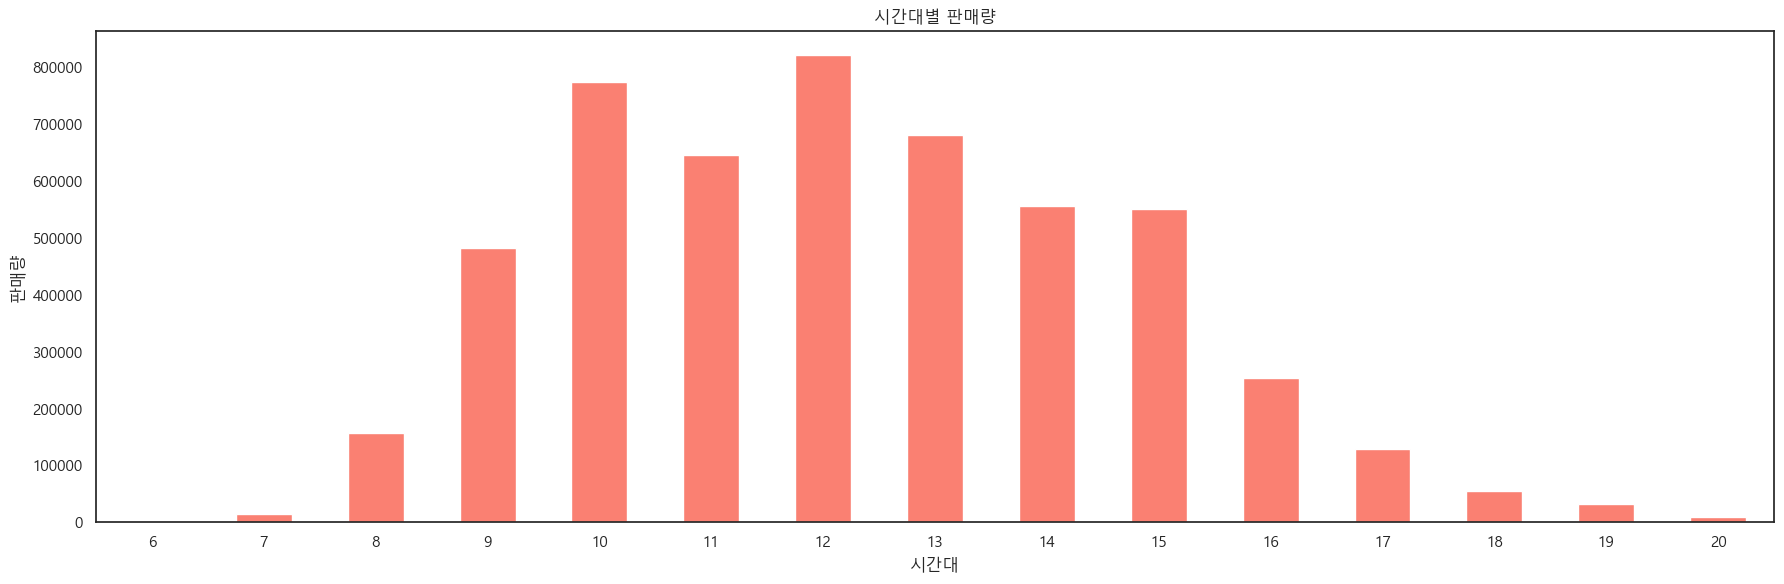

In [32]:
hourly_sales = ecom_df.groupby('Hour')['Quantity'].sum()

# 시간별 판매량 그래프 그리기
plt.figure(figsize=(18, 6))
hourly_sales.plot(kind='bar', color='salmon')
plt.xlabel('시간대')
plt.ylabel('판매량')
plt.title('시간대별 판매량')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

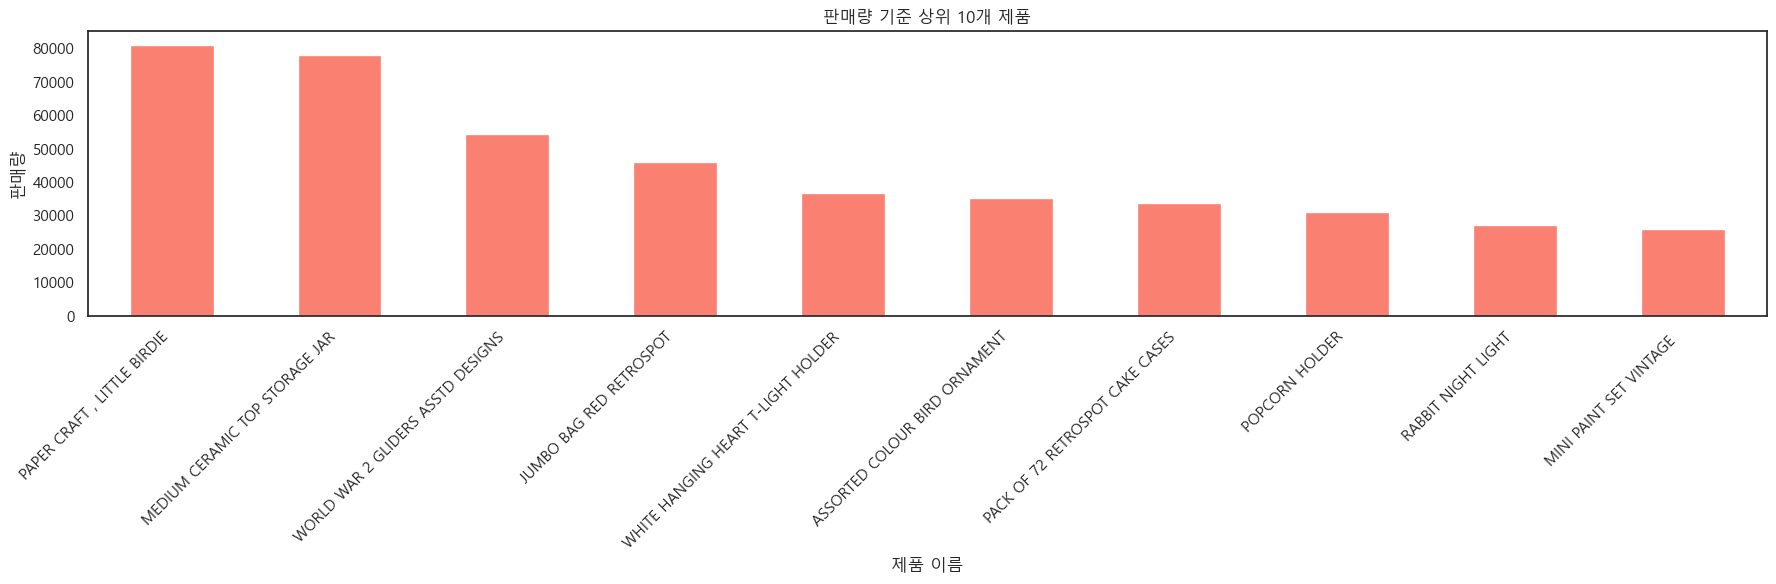

In [33]:
product_revenue = ecom_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

top_10_revenue = product_revenue.head(10)

plt.figure(figsize=(18, 6))
top_10_revenue.plot(kind='bar', color='salmon')
plt.xlabel('제품 이름')
plt.ylabel('판매량')
plt.title('판매량 기준 상위 10개 제품')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

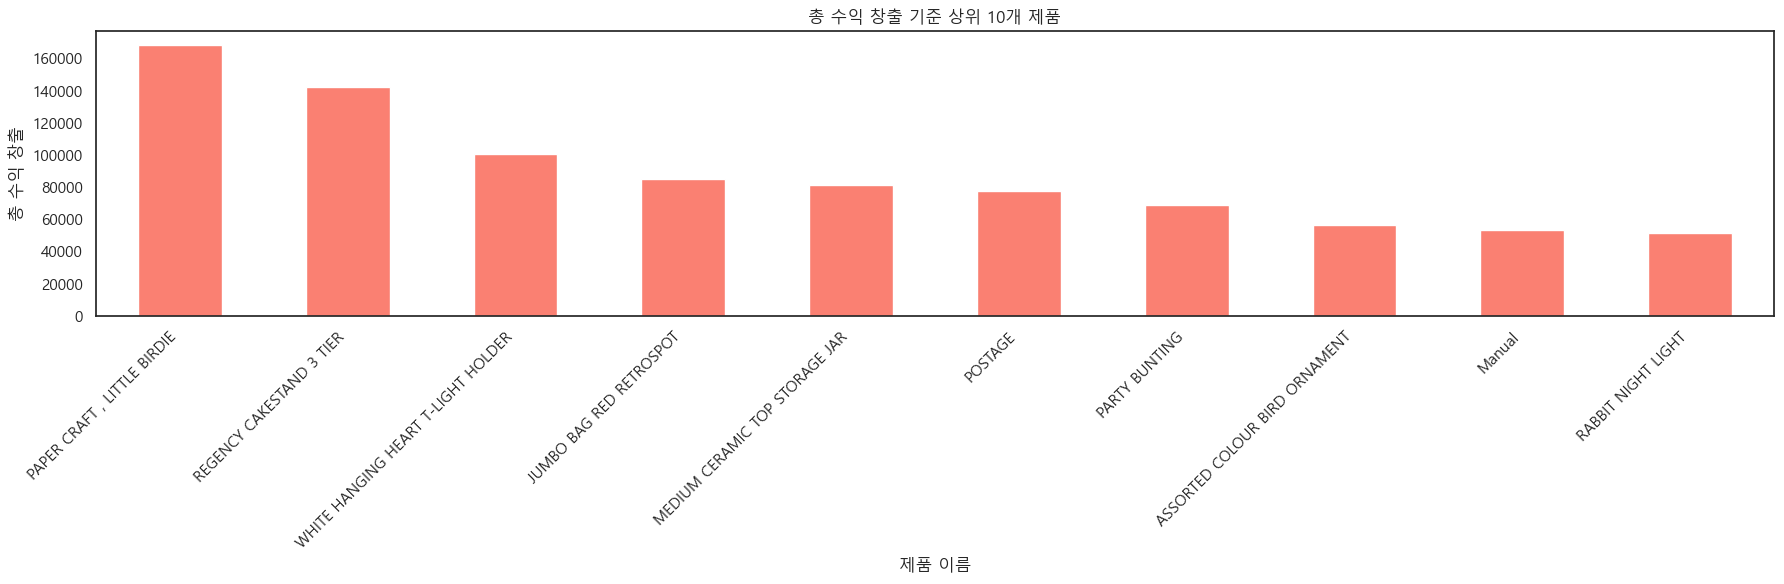

In [34]:
product_revenue = ecom_df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

top_10_revenue = product_revenue.head(10)

plt.figure(figsize=(18, 6))
top_10_revenue.plot(kind='bar', color='salmon')
plt.xlabel('제품 이름')
plt.ylabel('총 수익 창출')
plt.title('총 수익 창출 기준 상위 10개 제품')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

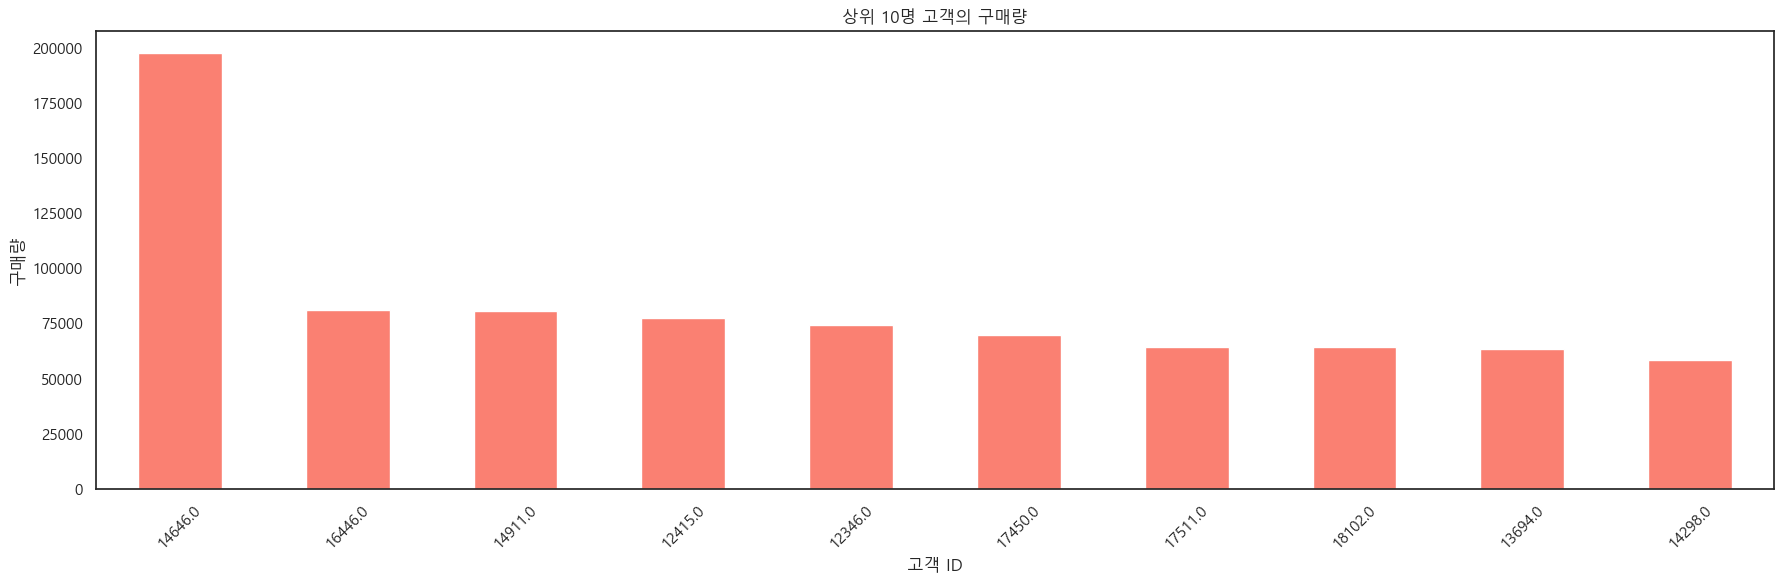

In [35]:
customer_purchase = ecom_df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)

top_10_customers = customer_purchase.head(10)

plt.figure(figsize=(18, 6))
top_10_customers.plot(kind='bar', color='salmon')
plt.xlabel('고객 ID')
plt.ylabel('구매량')
plt.title('상위 10명 고객의 구매량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

이상치
- z_score() 사용해서 z-점수 계산
- 임계값 설정
    - 임계값 3으로 설정 
        일반적으로 사용되는 표준적인 임계값 중 하나,통계적으로 표준편차의 약 3배에 해당하는 값
         Z-점수가 이 값을 초과하면 해당 데이터 포인트를 이상치로 간주하는 방법을 사용
         일반적으로 정규 분포에서 대부분의 데이터가 평균에서 약 ±3 표준편차 내에 있음을 고려

In [36]:
# Z-점수 계산
z_scores_quantity = np.abs(stats.zscore(ecom_df['Quantity']))
z_scores_unitprice = np.abs(stats.zscore(ecom_df['UnitPrice']))

# 임계값 설정
z_score_threshold = 3

# 이상치 식별
outliers_quantity = ecom_df[z_scores_quantity > z_score_threshold]
outliers_unitprice = ecom_df[z_scores_unitprice > z_score_threshold]

수량 및 단가 열 크기 조정
- 이상치를 해당 열의 하위 5%와 상위 5% 값으로 대체

In [37]:
ecom_df2 = ecom_df.copy()

ecom_df2['Quantity_winsorized'] = winsorize(ecom_df['Quantity'], limits=[0.05, 0.05])
ecom_df2['UnitPrice_winsorized'] = winsorize(ecom_df['UnitPrice'], limits=[0.05, 0.05])

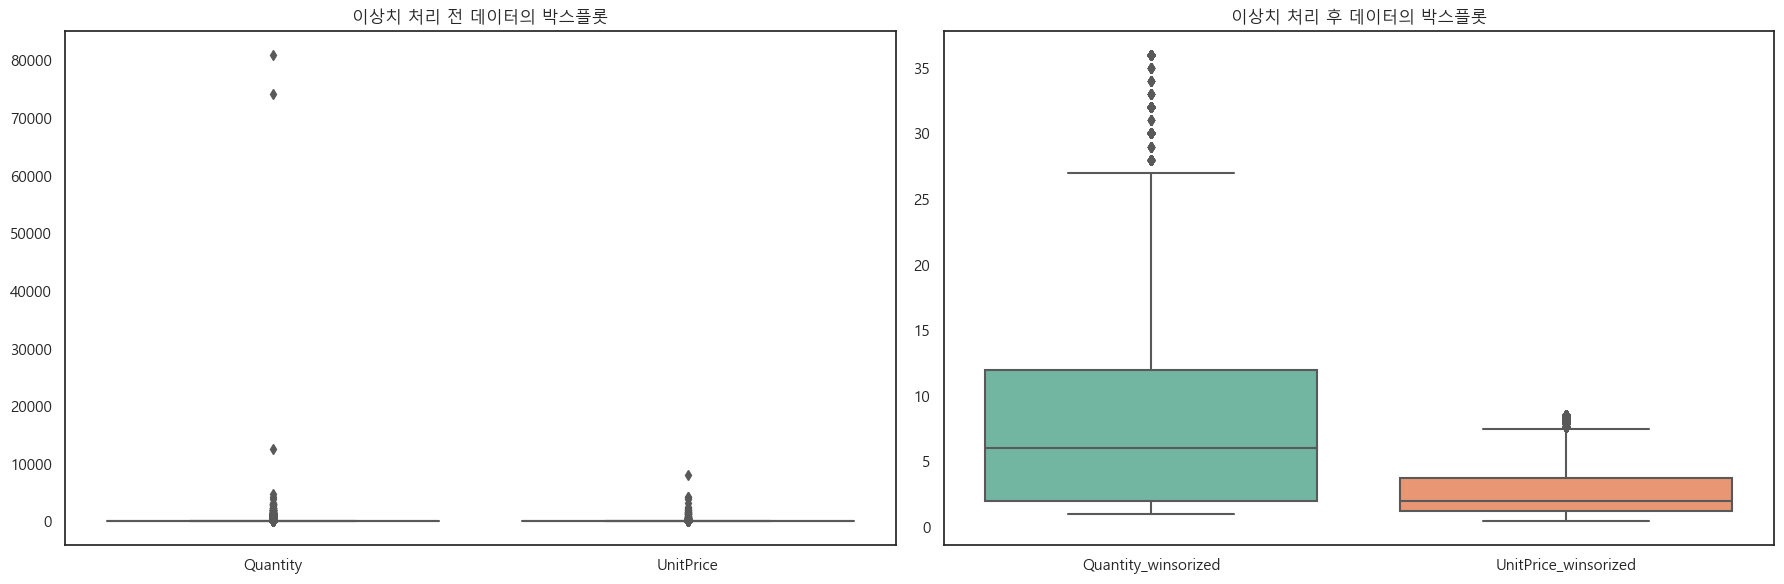

In [38]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=ecom_df2[['Quantity', 'UnitPrice']], palette='Set2')
plt.title('이상치 처리 전 데이터의 박스플롯')

plt.subplot(1, 2, 2)
sns.boxplot(data=ecom_df2[['Quantity_winsorized', 'UnitPrice_winsorized']], palette='Set2')
plt.title('이상치 처리 후 데이터의 박스플롯')

plt.tight_layout()
plt.show()

In [39]:
ecom_df2["TotalPrice"] = ecom_df["Quantity"] * ecom_df["UnitPrice"]

In [40]:
ecom_df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Quantity_winsorized,UnitPrice_winsorized
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,6,2.55
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,6,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,8,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,6,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,6,3.39


In [41]:
ecom_df2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Quantity_winsorized,UnitPrice_winsorized
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,12,0.85
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,6,2.10
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4,4.15
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4,4.15
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,12,3,4.95


RFM

- Recency

In [42]:
ecom_df3 = pd.read_csv('./UK Ecommerce.csv',encoding='unicode_escape')
ecom_df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [43]:
# Dropping the rows that have unit price and Quantity as negative. 
ecom_df3 = ecom_df3[(ecom_df3['UnitPrice']> 0) & (ecom_df3['Quantity']>0)]

In [44]:
#Dropping the duplicate rows
ecom_df3 = ecom_df3.drop_duplicates()

In [45]:
most_recent_purchase = max(ecom_df3['InvoiceDate'])
most_recent_purchase

'9/9/2011 9:52'

In [46]:
ecom_df3['InvoiceDate']= pd.to_datetime(ecom_df3['InvoiceDate'])

In [47]:
ecom_df3 = ecom_df3.drop_duplicates()

In [48]:
ecom_df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,392692.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13955.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15150.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1713.539549


In [49]:
most_recent_purchase = max(ecom_df3['InvoiceDate'])
most_recent_purchase

Timestamp('2011-12-09 12:50:00')

In [50]:
# 구매 건별 최근도 산출
ecom_df3['Recency'] = ecom_df3['InvoiceDate'].apply(lambda row: (most_recent_purchase - row).days)

c:\Users\User\miniconda3\envs\zb_dsStudy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



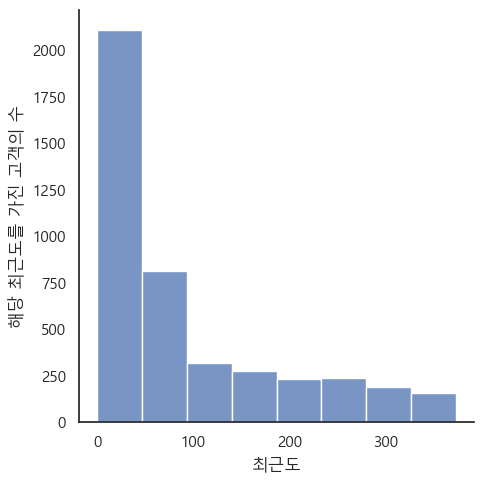

In [51]:
# 구매자별로 최근 구매일 산출
df_recent = ecom_df3.groupby('CustomerID')['Recency'].min()
sns.displot(df_recent,bins=8)

plt.xlabel('최근도')
plt.ylabel('해당 최근도를 가진 고객의 수')
plt.show()

구매일의 분포를 통해서 최근에 구매를 한 고객이 많은 것으로 보인다. 최근 1.5개월 정도에 약 2000명이 넘는 고객이 구매했다

- Frequency

c:\Users\User\miniconda3\envs\zb_dsStudy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



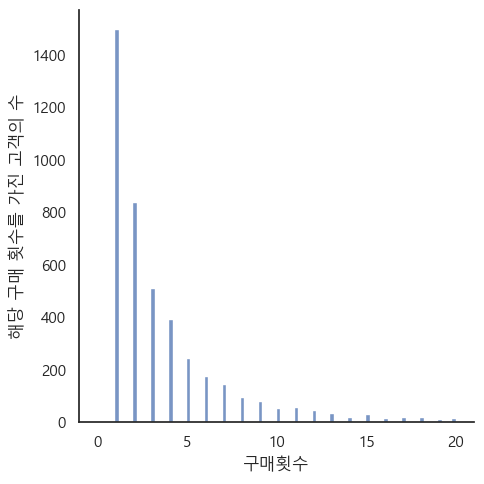

In [52]:
# 고객 구매 빈도 추출
df_freq = ecom_df3.groupby('CustomerID')['InvoiceDate'].nunique()
sns.displot(df_freq,bins=100,binrange=(0,20))
plt.xlabel('구매횟수')
plt.ylabel('해당 구매 횟수를 가진 고객의 수')
plt.show()

In [53]:
df_freq.value_counts()

InvoiceDate
1      1495
2       833
3       508
4       391
5       242
6       172
7       142
8        94
9        77
11       53
10       51
12       42
13       31
15       29
17       18
18       17
14       16
20       13
16       12
21       10
19       10
26        7
30        7
25        6
22        6
24        5
27        4
23        4
36        3
33        2
46        2
29        2
55        2
34        2
39        2
44        2
31        2
50        2
28        2
32        2
57        1
91        1
124       1
210       1
38        1
83        1
61        1
93        1
35        1
41        1
47        1
58        1
201       1
73        1
95        1
37        1
54        1
45        1
Name: count, dtype: int64

- Monetary

In [54]:
# 고객이 구매한 총 구매액 계산
ecom_df3['Amount'] = ecom_df3['UnitPrice']*ecom_df3['Quantity']

c:\Users\User\miniconda3\envs\zb_dsStudy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



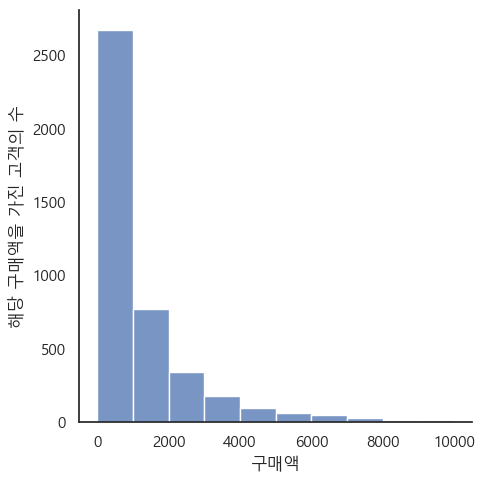

In [55]:
# 고객이 구매한 총 구매액 추출
df_monetary = ecom_df3.groupby('CustomerID')['Amount'].sum()
sns.displot(df_monetary,bins=10,binrange=(0,10000))

plt.xlabel('구매액')
plt.ylabel('해당 구매액을 가진 고객의 수')
plt.show()

In [56]:
df_monetary.value_counts()

Amount
76.32      4
35.40      3
363.65     3
15.00      3
440.00     3
          ..
477.79     1
1530.75    1
605.06     1
183.85     1
1837.28    1
Name: count, Length: 4256, dtype: int64

In [57]:
rfm_df = pd.DataFrame(columns=['CustomerID'])

In [58]:
# rfm_df에 커스텀 아이디를 기준으로 합치기

rfm_df['CustomerID'] = df_recent.index
rfm_df = rfm_df.merge(df_recent,on='CustomerID')

rfm_df = rfm_df.merge(df_freq,on='CustomerID')

rfm_df = rfm_df.merge(df_monetary,on='CustomerID')

rfm_df.rename(columns={'InvoiceDate':'Frequency'},inplace=True)

In [59]:
rfm_df

,CustomerID,Recency,Frequency,Amount
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2045.53


In [60]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.250807,2048.688081
std,1721.808492,100.014169,7.635202,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.000000,5.000000,1660.597500
max,18287.000000,373.000000,210.000000,280206.020000


<Axes: xlabel='Recency', ylabel='Frequency'>

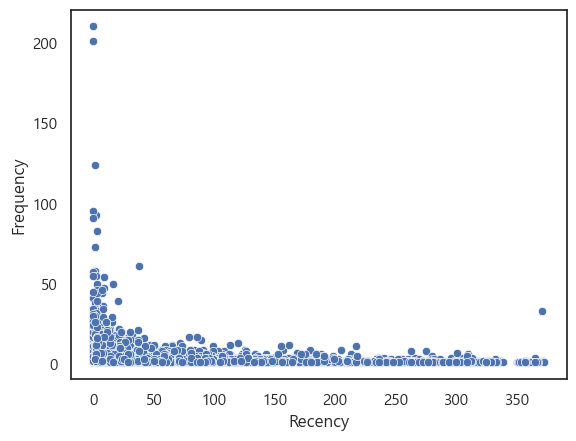

In [61]:
sns.scatterplot(data=rfm_df, x="Recency", y="Frequency",marker='o')

위의 그래프를 통해서 구매량이 많은 사람일 수록 최근에 구매했다는 상관관계를 알 수 있다

[(0.0, 10000.0)]

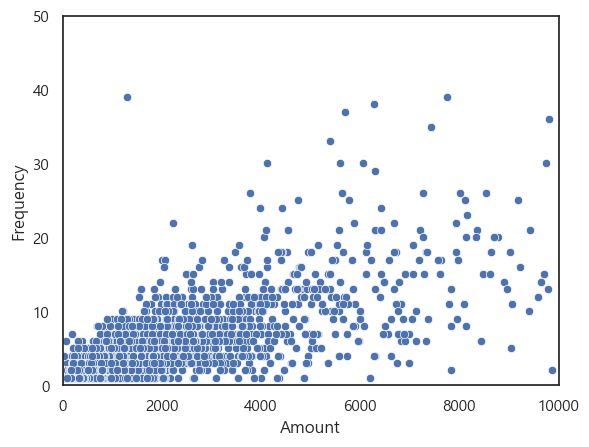

In [62]:
#Frequency vs Amount
ax = sns.scatterplot(data=rfm_df, x="Amount", y="Frequency",marker='o')
ax.set(ylim=(0,50))
ax.set(xlim=(0,10000))

In [63]:
rfm_df.head()

,CustomerID,Recency,Frequency,Amount
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
